In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Study\Bicycle Traffic\Data Excel\samplebicycledata.csv")
df.head()

,ID,interval,timestamp,latitude,longitude,distance,heartrate,cadence,speed,power,...,fitness,height,weight,altitude,latitude_rad,longitude_rad,heartrate_delayed,grade_percentage,grade_category,grade_percentage_rounded
0,RW_0264,56,2023-07-13T13:37:37.000Z,51.241379,7.152575,245.059998,118.0,85.0,6.615,153.0,...,Good,175,74.0,246.14999,0.894331,0.124836,138,1.664145,6 Slight uphill [1% to 3%],2
1,RW_0264,57,2023-07-13T13:37:38.000Z,51.241319,7.152594,251.619995,118.0,83.0,6.559,228.0,...,Good,175,74.0,246.25999,0.894330,0.124836,139,1.676830,6 Slight uphill [1% to 3%],2
2,RW_0264,58,2023-07-13T13:37:39.000Z,51.241269,7.152622,257.929993,118.0,83.0,6.308,308.0,...,Good,175,74.0,246.67999,0.894329,0.124837,140,6.656104,8 Steep uphill [5% to 10%],7
3,RW_0264,59,2023-07-13T13:37:40.000Z,51.241221,7.152653,263.980011,119.0,80.0,6.056,308.0,...,Good,175,74.0,246.99001,0.894328,0.124837,140,5.124282,8 Steep uphill [5% to 10%],5
4,RW_0264,60,2023-07-13T13:37:41.000Z,51.241173,7.152683,269.619995,119.0,85.0,5.636,203.0,...,Good,175,74.0,247.27000,0.894327,0.124838,141,4.964376,7 Moderate uphill [3% to 5%],5


# Interpolating speed data

### Loading data for rider RW_2015, RW_1111. RW_7125, RW_8403 

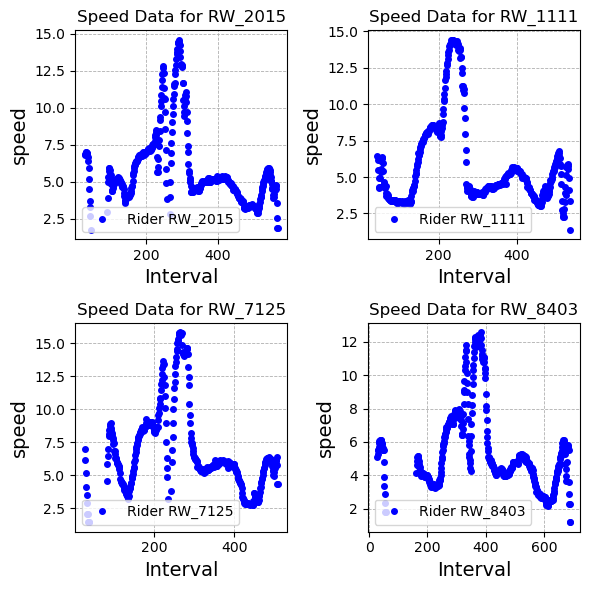

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def interpolate_heart_rate(interval, speed, method, x_new):
    f = interp1d(interval, speed, kind=method, fill_value="extrapolate")
    return f(x_new)

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
interpolation_methods = ['nearest', 'linear', 'quadratic', 'cubic']

x_new = np.linspace(df['interval'].min(), min(500, df['interval'].max()), 100)

fig, axs = plt.subplots(2, 2, figsize=(6, 6))

for i, rider_id in enumerate(rider_ids):
    ax = axs[i // 2, i % 2]  
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    ax.plot(interval, speed, '.', markersize=8, label=f'Rider {rider_id}', color='blue')
    ax.set_title(f'Speed Data for {rider_id}', fontsize=12)
    ax.set_xlabel('Interval', fontsize=14)
    ax.set_ylabel('speed', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax.legend()
    
plt.tight_layout()
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed.png', format='png')
plt.show()

### Nearest, Linear, Quadratic, Cubic Interpolation

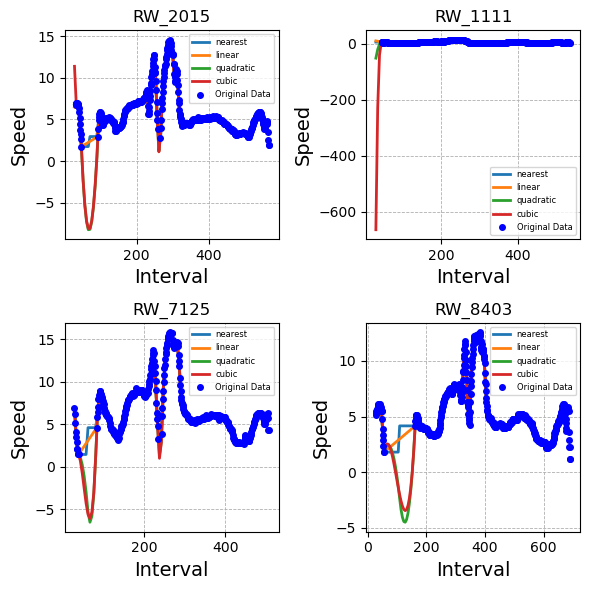

Interpolation Performance Metrics:
   Rider ID     Method       MAE          MSE       RMSE          R²
0   RW_2015    nearest  0.074971     0.021554   0.146814    0.997090
1   RW_2015     linear  0.002790     0.000778   0.027900    0.999895
2   RW_2015  quadratic  0.715062     5.885030   2.425908    0.205382
3   RW_2015      cubic  0.753878     5.968671   2.443086    0.194088
4   RW_1111    nearest  0.026006     0.002245   0.047377    0.999754
5   RW_1111     linear  0.087903     0.282278   0.531298    0.969100
6   RW_1111  quadratic  0.925890    40.657134   6.376295   -3.450636
7   RW_1111      cubic  9.540447  5073.351386  71.227462 -554.367272
8   RW_7125    nearest  0.114695     0.084497   0.290684    0.991808
9   RW_7125     linear  0.000000     0.000000   0.000000    1.000000
10  RW_7125  quadratic  0.539067     3.776860   1.943414    0.633835
11  RW_7125      cubic  0.578462     3.993664   1.998415    0.612816
12  RW_8403    nearest  0.156577     0.106288   0.326018    0.985138

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Interpolation function
def interpolate_heart_rate(interval, cadence, method, x_new):
    f = interp1d(interval, cadence, kind=method, fill_value="extrapolate")
    return f(x_new)

# Rider IDs and interpolation methods
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
interpolation_methods = ['nearest', 'linear', 'quadratic', 'cubic']

# New interval points for interpolation
x_new = np.linspace(df['interval'].min(), min(500, df['interval'].max()), 100)
fig, axs2 = plt.subplots(2, 2, figsize=(6, 6))

# Initialize a list to store error metrics
error_metrics = []

# Loop over each rider and interpolation method to compute error metrics
for i, rider_id in enumerate(rider_ids):
    ax2 = axs2[i // 2, i % 2]
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    for method in interpolation_methods:
        # Interpolate the speed data
        y_new = interpolate_heart_rate(interval, speed, method, x_new)

        # Align the interpolated data with original points (only for valid intervals)
        y_true = np.interp(x_new, interval, speed)  # Reference values
        y_pred = y_new  # Interpolated values
        
        # Calculate error metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

        # Store the metrics in the list
        error_metrics.append({
            "Rider ID": rider_id,
            "Method": method,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2
        })

        # Plot the interpolated data
        ax2.plot(x_new, y_new, label=method, linewidth=2)

    # Plot the original data
    ax2.plot(interval, speed, '.', markersize=8, label='Original Data', color='blue')
    ax2.set_title(f'{rider_id}', fontsize=12)
    ax2.set_xlabel('Interval', fontsize=14)
    ax2.set_ylabel('Speed', fontsize=14)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax2.legend( fontsize=6)

# Adjust spacing between subplots
plt.tight_layout()

# Save both figures as high-resolution images
fig.savefig('riders_heart_rate_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig('riders_interpolation_methods.png', dpi=300, bbox_inches='tight')
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_spline_interpolation.png', format='png')
# Show the plots
plt.show()

# Display the error metrics
error_metrics_df = pd.DataFrame(error_metrics)
print("Interpolation Performance Metrics:")
print(error_metrics_df)


### PCHIP

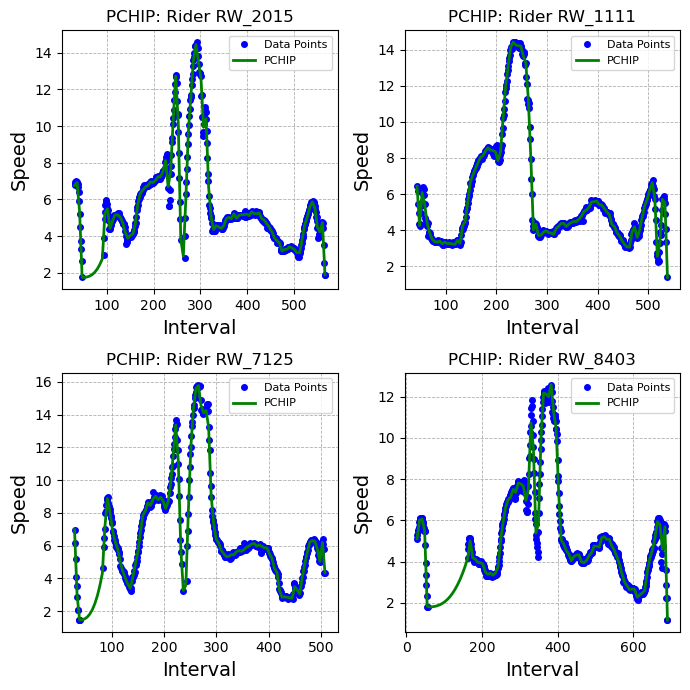

Error Metrics for PCHIP Interpolation:
  Rider ID       MAE       MSE      RMSE        R²
0  RW_2015  0.032974  0.008850  0.094077  0.998712
1  RW_1111  0.000000  0.000000  0.000000  1.000000
2  RW_7125  0.074564  0.055225  0.235000  0.994567
3  RW_8403  0.089883  0.054704  0.233889  0.990876


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the list of rider IDs
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

# Initialize a list to store error metrics
error_metrics = []

# Loop through each rider to perform PCHIP interpolation and calculate error metrics
for i, rider_id in enumerate(rider_ids):
    # Filter data for the specific rider
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    # Perform PCHIP interpolation
    pchip_interpolator = PchipInterpolator(interval, speed)
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    y_pchip = pchip_interpolator(x_new)

    # Align interpolated and original data points for error calculation
    y_true = np.interp(x_new, interval, speed)  # Reference values
    y_pred = y_pchip  # PCHIP interpolated values
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the metrics
    error_metrics.append({
        "Rider ID": rider_id,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

    # Plot original and interpolated data
    axes[i].plot(interval, speed, '.', label='Data Points', markersize=8, color='blue')
    axes[i].plot(x_new, y_pchip, label='PCHIP', linestyle='-', color='green', linewidth=2)
    
    # Formatting the plot
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=14)
    axes[i].set_ylabel('Speed', fontsize=14)
    axes[i].set_title(f'PCHIP: Rider {rider_id}', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].legend(fontsize=8)

# Adjust layout and save figure
plt.tight_layout()
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_pchip.png', format='png')
plt.show()

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each rider
print("Error Metrics for PCHIP Interpolation:")
print(error_metrics_df)


### B-Spline

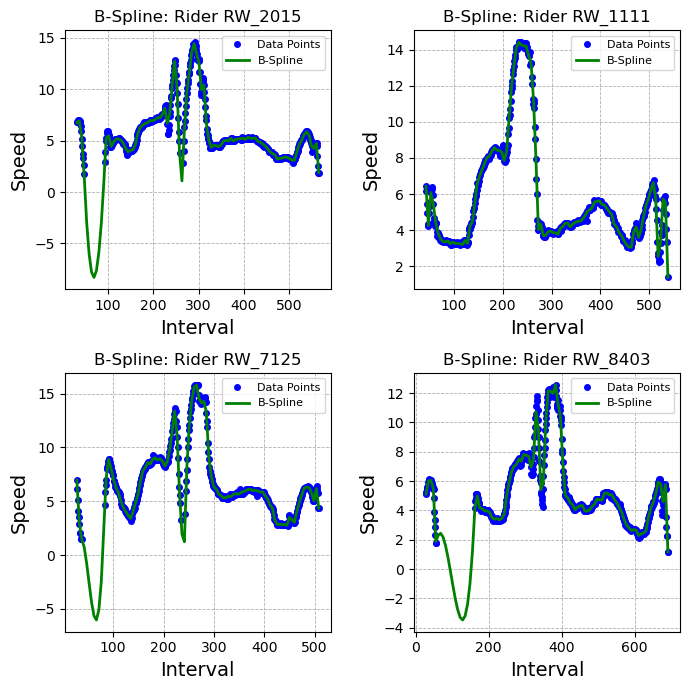

Error Metrics for B-Spline Interpolation:
  Rider ID       MAE       MSE      RMSE        R²
0  RW_2015  0.630724  5.160118  2.271589  0.249163
1  RW_1111  0.006619  0.000075  0.008645  0.999992
2  RW_7125  0.569060  3.883750  1.970723  0.617931
3  RW_8403  0.559329  2.917207  1.707983  0.513461


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the list of rider IDs
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

# Set up the figure for plotting
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

# Initialize a list to store error metrics
error_metrics = []

# Loop through each rider to perform B-spline interpolation and calculate error metrics
for i, rider_id in enumerate(rider_ids):
    # Filter data for the specific rider
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    # Perform B-spline interpolation
    tck = splrep(interval, speed, s=0.05)  # s=1 is a smoothing factor
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    y_spline = splev(x_new, tck)

    # Align interpolated and original data points for error calculation
    y_true = np.interp(x_new, interval, speed)  # Reference values
    y_pred = y_spline  # B-spline interpolated values
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the metrics
    error_metrics.append({
        "Rider ID": rider_id,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

    # Plot original and interpolated data
    axes[i].plot(interval, speed, '.', label='Data Points', markersize=8, color='blue')
    axes[i].plot(x_new, y_spline, label='B-Spline', linestyle='-', color='green', linewidth=2)
    
    # Formatting the plot
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=14)
    axes[i].set_ylabel('Speed', fontsize=14)
    axes[i].set_title(f'B-Spline: Rider {rider_id}', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].legend(fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_bspline.png', format='png')
plt.show()

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each rider
print("Error Metrics for B-Spline Interpolation:")
print(error_metrics_df)


# PCHIP and Smoothing Algorithms

### Gaussian and PCHIP

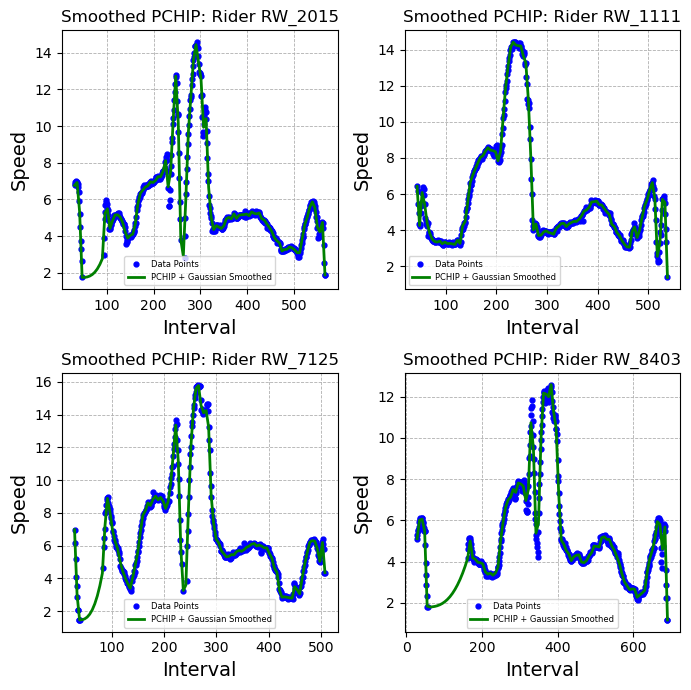

Error Metrics for PCHIP Interpolation followed by Gaussian Smoothing:
  Rider ID       MAE       MSE      RMSE        R²
0  RW_2015  0.032974  0.008850  0.094077  0.998712
1  RW_1111  0.000000  0.000000  0.000000  1.000000
2  RW_7125  0.074564  0.055225  0.235000  0.994567
3  RW_8403  0.089883  0.054704  0.233889  0.990876


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_absolute_error, mean_squared_error

# List of rider IDs to analyze
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

# Initialize a list to store error metrics
error_metrics = []

# Loop through each rider
for i, rider_id in enumerate(rider_ids):
    
    # Filter data for each rider and drop NaNs in speed and interval columns
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    # Step 1: Interpolate data using PCHIP
    pchip_interpolator = PchipInterpolator(interval, speed)
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    y_pchip = pchip_interpolator(x_new)
    
    # Step 2: Apply Gaussian smoothing to the interpolated data
    y_smoothed = gaussian_filter1d(y_pchip, sigma=0.1)  # sigma controls the degree of smoothing
    
    # Align interpolated and smoothed data with original points for error calculation
    y_true = np.interp(x_new, interval, speed)  # Reference values based on original data
    y_pred = y_smoothed  # Smoothed values after PCHIP interpolation
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the metrics
    error_metrics.append({
        "Rider ID": rider_id,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

    # Plot original data points
    axes[i].plot(interval, speed, '.', markersize=7, color='blue', label='Data Points')
    
    # Plot the Gaussian-smoothed PCHIP interpolated data
    axes[i].plot(x_new, y_smoothed, label='PCHIP + Gaussian Smoothed', linestyle='-', color='green', linewidth=2)
    
    # Customize plot aesthetics
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=14)
    axes[i].set_ylabel('Speed', fontsize=14)
    axes[i].set_title(f'Smoothed PCHIP: Rider {rider_id}', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].legend(fontsize=6)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution image
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_pchip_gaussian.png', format='png')

# Show the plot
plt.show()

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each rider
print("Error Metrics for PCHIP Interpolation followed by Gaussian Smoothing:")
print(error_metrics_df)


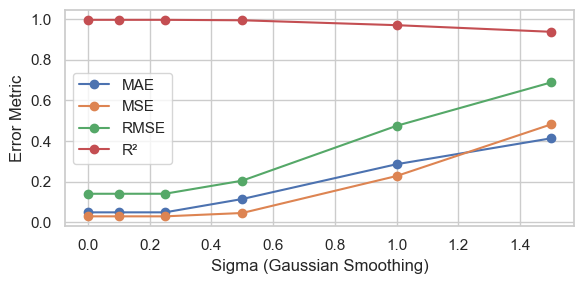

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_absolute_error, mean_squared_error

# List of rider IDs to analyze
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
smoothing_values = [0.001, 0.1, 0.25, 0.5, 1, 1.5]

# Initialize a DataFrame to store error metrics for each sigma value
error_metrics = {sigma: {"MAE": [], "MSE": [], "RMSE": [], "R²": []} for sigma in smoothing_values}

# Loop through each rider and each sigma value
for sigma in smoothing_values:
    for rider_id in rider_ids:
        
        # Filter data for each rider and drop NaNs in speed and interval columns
        rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
        interval = rider_data['interval'].values
        speed = rider_data['speed'].values
        
        # Step 1: Interpolate data using PCHIP
        pchip_interpolator = PchipInterpolator(interval, speed)
        x_new = np.linspace(min(interval), min(max(interval), 700), 100)
        y_pchip = pchip_interpolator(x_new)
        
        # Step 2: Apply Gaussian smoothing with current sigma
        y_smoothed = gaussian_filter1d(y_pchip, sigma=sigma)
        
        # Align interpolated and smoothed data with original points for error calculation
        y_true = np.interp(x_new, interval, speed)  # Reference values based on original data
        y_pred = y_smoothed  # Smoothed values after PCHIP interpolation
        
        # Calculate error metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
        
        # Store the metrics for the current sigma
        error_metrics[sigma]["MAE"].append(mae)
        error_metrics[sigma]["MSE"].append(mse)
        error_metrics[sigma]["RMSE"].append(rmse)
        error_metrics[sigma]["R²"].append(r2)

# Average the error metrics across riders for each sigma value
avg_error_metrics = {sigma: {metric: np.mean(values) for metric, values in metrics.items()} 
                     for sigma, metrics in error_metrics.items()}

# Convert to DataFrame for easier plotting
avg_error_df = pd.DataFrame(avg_error_metrics).T

# Plot error metrics for different sigma values
plt.figure(figsize=(6, 3))

# Plot each error metric
for metric in ["MAE", "MSE", "RMSE", "R²"]:
    plt.plot(avg_error_df.index, avg_error_df[metric], marker='o', label=metric)

# Customize the plot
plt.xlabel("Sigma (Gaussian Smoothing)", fontsize=12)
plt.ylabel("Error Metric", fontsize=12)
#plt.title("Error Metrics for PCHIP + Gaussian Smoothing with Different Sigma Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_pchip_gaussian_smoothing_factors.png', format='png')
# Show the plot
plt.show()


### Pchip and least square

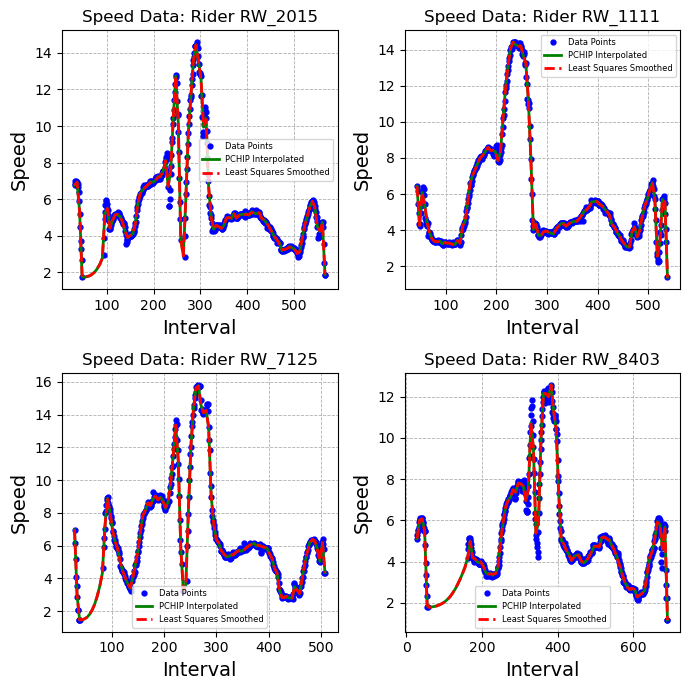

Error Metrics for PCHIP Interpolation and Least Squares Smoothing:
  Rider ID       MAE       MSE      RMSE        R²
0  RW_2015  0.049383  0.009764  0.098812  0.998579
1  RW_1111  0.026260  0.000999  0.031608  0.999891
2  RW_7125  0.088885  0.056042  0.236733  0.994487
3  RW_8403  0.107359  0.055673  0.235952  0.990715


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator, UnivariateSpline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# List of rider IDs to analyze
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

# Initialize a list to store error metrics
error_metrics = []

# Loop through each rider
for i, rider_id in enumerate(rider_ids):
    
    # Filter data for each rider and drop NaNs in speed and interval columns
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    # Step 1: Interpolate data using PCHIP
    pchip_interpolator = PchipInterpolator(interval, speed)
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    y_pchip = pchip_interpolator(x_new)
    
    # Step 2: Apply Least Squares Smoothing to the interpolated data
    smoothing_factor = 0.1  # Adjust the smoothing factor for the Least Squares fit
    spline = UnivariateSpline(x_new, y_pchip, s=smoothing_factor)
    y_ls_smooth = spline(x_new)
    
    # Align interpolated and smoothed data with original points for error calculation
    y_true = np.interp(x_new, interval, speed)  # Reference values based on original data
    y_pred = y_ls_smooth  # Least Squares smoothed values after PCHIP interpolation
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the metrics
    error_metrics.append({
        "Rider ID": rider_id,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

    # Plot original data points
    axes[i].plot(interval, speed, '.', markersize=7, color='blue', label='Data Points')
    
    # Plot PCHIP interpolated data
    axes[i].plot(x_new, y_pchip, label='PCHIP Interpolated', linestyle='-', color='green', linewidth=2)
    
    # Plot Least Squares smoothed data after interpolation
    axes[i].plot(x_new, y_ls_smooth, label='Least Squares Smoothed', linestyle='--', color='red', linewidth=2)
    
    # Customize plot aesthetics
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=14)
    axes[i].set_ylabel('Speed', fontsize=14)
    axes[i].set_title(f'Speed Data: Rider {rider_id}', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].legend(fontsize=6)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_pchip_least_square.png', format='png')

# Show the plot
plt.show()

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each rider
print("Error Metrics for PCHIP Interpolation and Least Squares Smoothing:")
print(error_metrics_df)


Average Error Metrics for Different Smoothing Factors:
            MAE       MSE      RMSE        R²
0.001  0.049971  0.029707  0.141561  0.996037
0.100  0.067972  0.030620  0.150776  0.995918
0.250  0.080428  0.032175  0.158874  0.995717
0.500  0.096814  0.034643  0.169404  0.995398
1.000  0.117854  0.039497  0.186275  0.994762
1.500  0.135480  0.044476  0.201118  0.994112
2.000  0.143696  0.049591  0.214589  0.993445
2.500  0.155634  0.054459  0.226476  0.992812


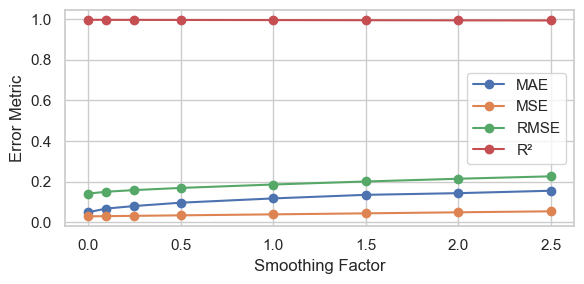

In [23]:
import numpy as np
import pandas as pd
from scipy.interpolate import PchipInterpolator, UnivariateSpline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# List of rider IDs and smoothing factors to analyze
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
smoothing_factors = [0.001, 0.1, 0.25, 0.5, 1, 1.5, 2, 2.5]

# Initialize a dictionary to store error metrics for each smoothing factor
error_metrics = {sf: {"MAE": [], "MSE": [], "RMSE": [], "R²": []} for sf in smoothing_factors}

# Loop through each smoothing factor and rider
for smoothing_factor in smoothing_factors:
    for rider_id in rider_ids:
        
        # Filter data for each rider and drop NaNs in speed and interval columns
        rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
        interval = rider_data['interval'].values
        speed = rider_data['speed'].values
        
        # Step 1: Interpolate data using PCHIP
        pchip_interpolator = PchipInterpolator(interval, speed)
        x_new = np.linspace(min(interval), min(max(interval), 700), 100)
        y_pchip = pchip_interpolator(x_new)
        
        # Step 2: Apply Least Squares Smoothing to the interpolated data
        spline = UnivariateSpline(x_new, y_pchip, s=smoothing_factor)
        y_ls_smooth = spline(x_new)
        
        # Align interpolated and smoothed data with original points for error calculation
        y_true = np.interp(x_new, interval, speed)  # Reference values based on original data
        y_pred = y_ls_smooth  # Least Squares smoothed values after PCHIP interpolation
        
        # Calculate error metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
        
        # Store the metrics for the current smoothing factor
        error_metrics[smoothing_factor]["MAE"].append(mae)
        error_metrics[smoothing_factor]["MSE"].append(mse)
        error_metrics[smoothing_factor]["RMSE"].append(rmse)
        error_metrics[smoothing_factor]["R²"].append(r2)

# Average the error metrics across riders for each smoothing factor
avg_error_metrics = {sf: {metric: np.mean(values) for metric, values in metrics.items()} 
                     for sf, metrics in error_metrics.items()}

# Convert to DataFrame for easy viewing
avg_error_df = pd.DataFrame(avg_error_metrics).T

# Display the average error metrics
print("Average Error Metrics for Different Smoothing Factors:")
print(avg_error_df)

# Plot error metrics for different smoothing factors
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))

# Plot each error metric
for metric in ["MAE", "MSE", "RMSE", "R²"]:
    plt.plot(avg_error_df.index, avg_error_df[metric], marker='o', label=metric)

# Customize the plot
plt.xlabel("Smoothing Factor", fontsize=12)
plt.ylabel("Error Metric", fontsize=12)
#plt.title("Error Metrics for PCHIP + Least Squares Smoothing with Different Smoothing Factors", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_pchip_least_square_smoothing_factor.png', format='png')
# Show the plot
plt.show()


### pchip and kalman filter

Error Metrics for PCHIP Interpolation followed by Kalman Filter Smoothing:
  Rider ID       MAE       MSE      RMSE        R²
0  RW_2015  0.148222  0.061728  0.248451  0.991018
1  RW_1111  0.098173  0.031163  0.176531  0.996612
2  RW_7125  0.210445  0.119340  0.345456  0.988260
3  RW_8403  0.184465  0.094521  0.307443  0.984235


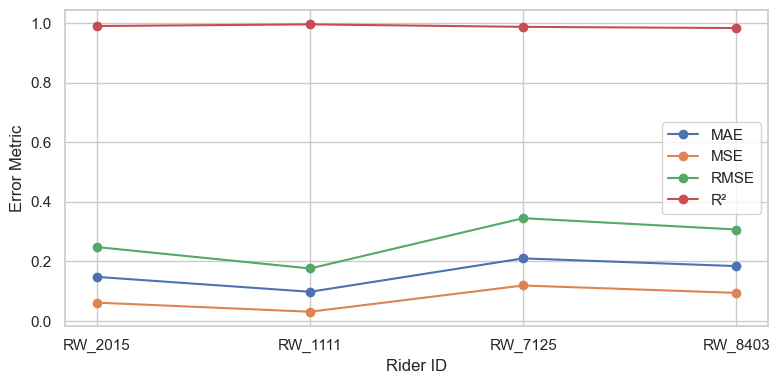

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Kalman filter implementation for smoothing
def kalman_filter_1d(data, process_variance=1, measurement_variance=1):
    n = len(data)
    x_est = np.zeros(n)  # Array to hold the filtered values
    p_est = np.zeros(n)  # Array to hold the estimation error covariance

    # Initial estimates
    x_est[0] = data[0]  # Initial state estimate
    p_est[0] = 1.0  # Initial estimation covariance

    for k in range(1, n):
        # Prediction step
        x_pred = x_est[k - 1]
        p_pred = p_est[k - 1] + process_variance

        # Update step
        kalman_gain = p_pred / (p_pred + measurement_variance)
        x_est[k] = x_pred + kalman_gain * (data[k] - x_pred)
        p_est[k] = (1 - kalman_gain) * p_pred

    return x_est

# List of rider IDs to analyze
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

# Initialize a DataFrame to store error metrics for each rider
error_metrics = []

# Loop through each rider
for rider_id in rider_ids:
    
    # Filter data for each rider and drop NaNs in speed and interval columns
    rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
    interval = rider_data['interval'].values
    speed = rider_data['speed'].values
    
    # Step 1: Interpolate data using PCHIP
    pchip_interpolator = PchipInterpolator(interval, speed)
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    y_pchip = pchip_interpolator(x_new)
    
    # Step 2: Apply Kalman filter smoothing to the interpolated data
    y_kalman_smooth = kalman_filter_1d(y_pchip, process_variance=4, measurement_variance=1)
    
    # Align interpolated and smoothed data with original points for error calculation
    y_true = np.interp(x_new, interval, speed)  # Reference values based on original data
    y_pred = y_kalman_smooth  # Smoothed values after PCHIP interpolation followed by Kalman filter
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the metrics
    error_metrics.append({
        "Rider ID": rider_id,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each rider
print("Error Metrics for PCHIP Interpolation followed by Kalman Filter Smoothing:")
print(error_metrics_df)

# Plot the error metrics for each rider
plt.figure(figsize=(8, 4))
for metric in ["MAE", "MSE", "RMSE", "R²"]:
    plt.plot(error_metrics_df["Rider ID"], error_metrics_df[metric], marker='o', label=metric)

# Customize the plot
plt.xlabel("Rider ID", fontsize=12)
plt.ylabel("Error Metric", fontsize=12)
#plt.title("Error Metrics for PCHIP + Kalman Filter Smoothing", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_pchip_kalman_multiple_parameter.png', format='png')
# Show the plot
plt.show()


Average Error Metrics for Different Process Variances:
          MAE       MSE      RMSE        R²
0.1  0.916659  1.772328  1.321607  0.778405
0.5  0.490893  0.588445  0.759396  0.925492
1.0  0.349136  0.311674  0.552101  0.960258
1.5  0.280849  0.206884  0.449222  0.973494
2.0  0.239119  0.153337  0.385999  0.980280
4.0  0.160327  0.076688  0.269470  0.990031
5.0  0.141320  0.063172  0.242533  0.991757
8.0  0.109706  0.045501  0.200547  0.994016


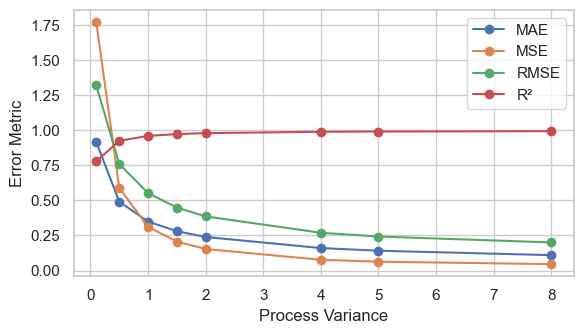

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Kalman filter implementation for smoothing
def kalman_filter_1d(data, process_variance, measurement_variance=1):
    n = len(data)
    x_est = np.zeros(n)  # Array to hold the filtered values
    p_est = np.zeros(n)  # Array to hold the estimation error covariance

    # Initial estimates
    x_est[0] = data[0]  # Initial state estimate
    p_est[0] = 1.0  # Initial estimation covariance

    for k in range(1, n):
        # Prediction step
        x_pred = x_est[k - 1]
        p_pred = p_est[k - 1] + process_variance

        # Update step
        kalman_gain = p_pred / (p_pred + measurement_variance)
        x_est[k] = x_pred + kalman_gain * (data[k] - x_pred)
        p_est[k] = (1 - kalman_gain) * p_pred

    return x_est

# List of rider IDs and process variances to analyze
rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
process_variances = [0.1, 0.5, 1, 1.5, 2, 4,5,8]

# Initialize a dictionary to store error metrics for each process variance
error_metrics = {pv: {"MAE": [], "MSE": [], "RMSE": [], "R²": []} for pv in process_variances}

# Loop through each process variance and rider
for process_variance in process_variances:
    for rider_id in rider_ids:
        
        # Filter data for each rider and drop NaNs in speed and interval columns
        rider_data = df[df['ID'] == rider_id].dropna(subset=['speed', 'interval'])
        interval = rider_data['interval'].values
        speed = rider_data['speed'].values
        
        # Step 1: Interpolate data using PCHIP
        pchip_interpolator = PchipInterpolator(interval, speed)
        x_new = np.linspace(min(interval), min(max(interval), 700), 100)
        y_pchip = pchip_interpolator(x_new)
        
        # Step 2: Apply Kalman filter smoothing to the interpolated data
        y_kalman_smooth = kalman_filter_1d(y_pchip, process_variance, measurement_variance=1)
        
        # Align interpolated and smoothed data with original points for error calculation
        y_true = np.interp(x_new, interval, speed)  # Reference values based on original data
        y_pred = y_kalman_smooth  # Smoothed values after PCHIP interpolation followed by Kalman filter
        
        # Calculate error metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
        
        # Store the metrics for the current process variance
        error_metrics[process_variance]["MAE"].append(mae)
        error_metrics[process_variance]["MSE"].append(mse)
        error_metrics[process_variance]["RMSE"].append(rmse)
        error_metrics[process_variance]["R²"].append(r2)

# Average the error metrics across riders for each process variance
avg_error_metrics = {pv: {metric: np.mean(values) for metric, values in metrics.items()} 
                     for pv, metrics in error_metrics.items()}

# Convert to DataFrame for easy viewing
avg_error_df = pd.DataFrame(avg_error_metrics).T

# Display the average error metrics
print("Average Error Metrics for Different Process Variances:")
print(avg_error_df)

# Plot error metrics for different process variances
plt.figure(figsize=(6, 3.5))

# Plot each error metric
for metric in ["MAE", "MSE", "RMSE", "R²"]:
    plt.plot(avg_error_df.index, avg_error_df[metric], marker='o', label=metric)

# Customize the plot
plt.xlabel("Process Variance", fontsize=12)
plt.ylabel("Error Metric", fontsize=12)
#plt.title("Error Metrics for PCHIP + Kalman Filter Smoothing with Different Process Variances", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('C:\\Study\\Bicycle Traffic\\Final Writing\\speed_pchip_kalman_multiple_process_variances.png', format='png')

# Show the plot
plt.show()


# Applying PCHIP and Gaussian Smoothing to All Cadence Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grouped = df.groupby('ID')['speed']

speed_df = pd.concat([group.reset_index(drop=True) for _, group in grouped], axis=1)

speed_df.columns = [rider_id for rider_id, _ in grouped]

In [13]:
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import PchipInterpolator
def apply_pchip_and_gaussian(series, sigma=.2):
    
    series = series.iloc[:1000]
    
    series = series[:series.last_valid_index() + 1]
    
    not_nan = ~series.isna()
    if not np.any(not_nan):
        return series 
    
    x = np.arange(len(series))
    y = series[not_nan]

    # PCHIP interpolation
    pchip_interpolator = PchipInterpolator(x[not_nan], y)
    y_interp = pchip_interpolator(x)
    
    # Apply Gaussian smoothing
    y_smoothed = gaussian_filter1d(y_interp, sigma=sigma)
    
    # Reinsert the trailing NaNs
    y_smoothed = np.concatenate([y_smoothed, np.full(len(series.index) - len(y_smoothed), np.nan)])
    
    return pd.Series(y_smoothed, index=series.index)

# Apply the function to each column in the DataFrame for the first 600 intervals
smoothed_speed_df = speed_df.apply(lambda col: apply_pchip_and_gaussian(col, sigma=.1))

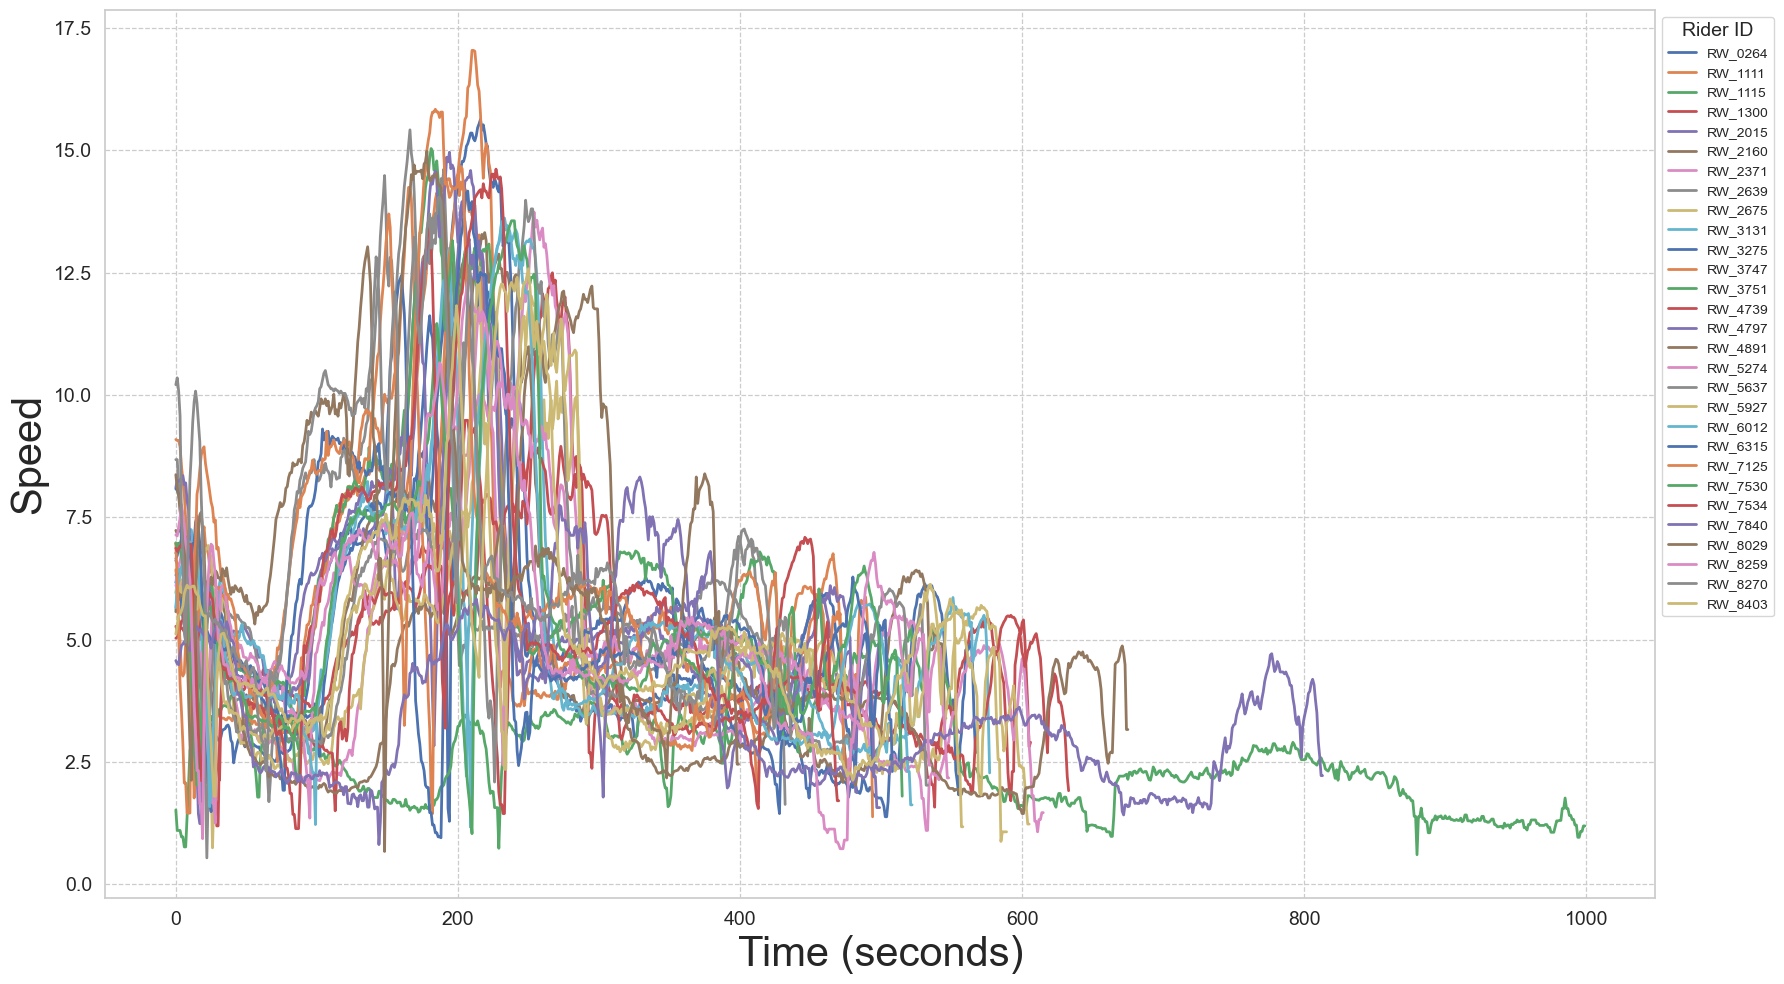

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn for enhanced visual style
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(18, 10))

# Plot each rider's smoothed heart rate data with distinct colors
for rider_id in smoothed_speed_df.columns:
    plt.plot(smoothed_speed_df.index, smoothed_speed_df[rider_id], label=rider_id, linewidth=2)

# Add labels and title with professional formatting
plt.xlabel('Time (seconds)', fontsize=30)
plt.ylabel('Speed', fontsize=30)
#plt.title('Smoothed and Interpolated Speed Sensor Data for All Riders', fontsize=10)

# Add a legend outside the plot for better readability
plt.legend(title='Rider ID', title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left', ncol=1)


# Adjust the ticks for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines with professional styling
plt.grid(True, which='both', linestyle='--', linewidth=0.9)

# Ensure the layout is tight and the plot doesn't overlap
plt.tight_layout()

# Save the figure as a high-resolution image suitable for a thesis
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\speed_all.png', format='png')

# Display the plot
plt.show()

## Data trend (Aggregate speed data after smoothing) with Gaussian smoothing

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

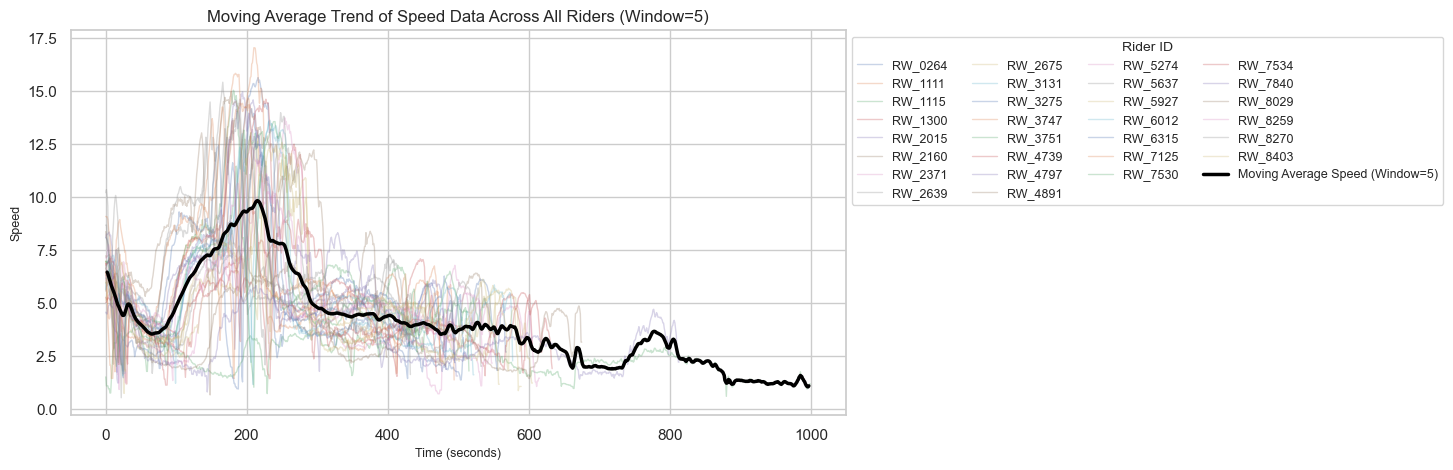

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set up Seaborn for enhanced visual style
sns.set(style="whitegrid")

# Step 1: Calculate the mean cadence across all riders at each time point
mean_speed = smoothed_speed_df.mean(axis=1)

# Step 2: Apply a moving average to the mean cadence
window_size = 5  # Adjust the window size as needed for smoothing
moving_average_speed = mean_speed.rolling(window=window_size, center=True).mean()

# Step 3: Plot each rider's cadence data with transparency and the moving average trend line
plt.figure(figsize=(10, 5))

# Plot all riders' cadence data with transparency
for rider_id in smoothed_speed_df.columns:
    plt.plot(smoothed_speed_df.index, smoothed_speed_df[rider_id], label=rider_id, linewidth=1, alpha=0.3)

# Plot the moving average trend line
plt.plot(smoothed_speed_df.index, moving_average_speed, color='black', linewidth=2.5, label=f'Moving Average Speed (Window={window_size})', linestyle='-')

# Add labels and title with professional formatting
plt.xlabel('Time (seconds)', fontsize=9)
plt.ylabel('Speed', fontsize=9)
plt.title(f'Moving Average Trend of Speed Data Across All Riders (Window={window_size})', fontsize=12)

# Add a legend outside the plot for better readability
plt.legend(title='Rider ID', title_fontsize=10, fontsize=9, bbox_to_anchor=(1, 1), loc='upper left', ncol=4)

# Adjust the ticks for better readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add gridlines with profession

Error Metrics for Different Moving Average Window Sizes:
   Window Size       MAE       MSE      RMSE        R²
0            5  0.031299  0.002448  0.049478  0.999451
1            7  0.041427  0.004019  0.063393  0.999097
2           10  0.058594  0.007188  0.084781  0.998382
3           12  0.066656  0.009226  0.096052  0.997921
4           15  0.076159  0.012306  0.110933  0.997222
5           20  0.094319  0.018676  0.136660  0.995782
6           22  0.100047  0.020894  0.144549  0.995279
7           25  0.106499  0.023571  0.153529  0.994671
8           50  0.150472  0.040895  0.202226  0.990785
9          100  0.265118  0.126639  0.355863  0.971547


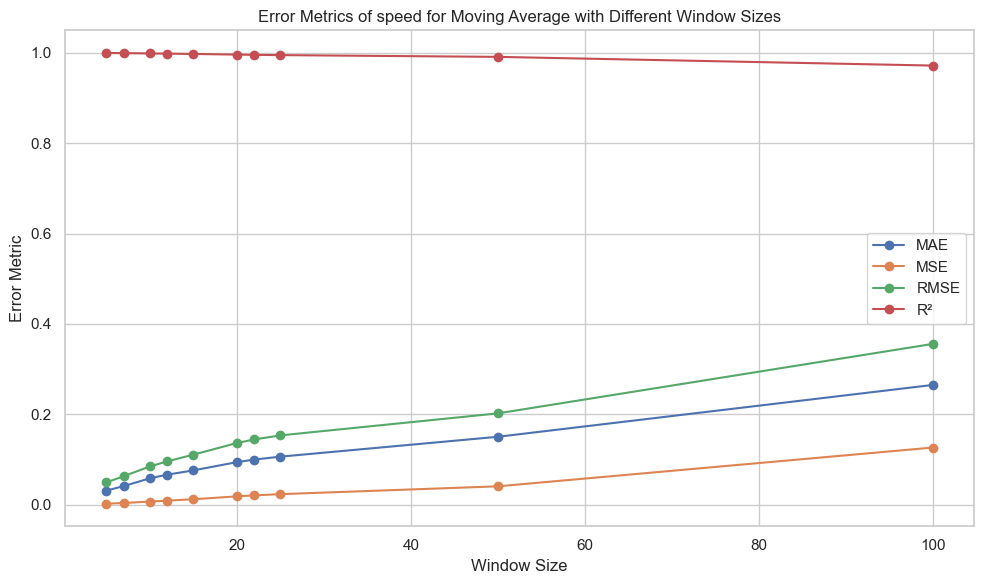

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Calculate the mean cadence across all riders at each time point
mean_speed = smoothed_speed_df.mean(axis=1)

# Define the different window sizes to test
window_sizes = [5, 7, 10, 12, 15, 20, 22, 25, 50,100]

# Initialize a dictionary to store error metrics for each window size
error_metrics = []

# Loop over each window size to apply the moving average and calculate error metrics
for window_size in window_sizes:
    # Apply moving average with the current window size
    smoothed_speed = mean_speed.rolling(window=window_size, center=True).mean()
    
    # Drop NaN values created by the moving average at the edges
    valid_indices = smoothed_speed.dropna().index
    y_true = mean_speed[valid_indices]
    y_pred = smoothed_speed[valid_indices]
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the results
    error_metrics.append({
        "Window Size": window_size,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each window size
print("Error Metrics for Different Moving Average Window Sizes:")
print(error_metrics_df)

# Plot the error metrics (optional)
plt.figure(figsize=(10, 6))
plt.plot(error_metrics_df["Window Size"], error_metrics_df["MAE"], label="MAE", marker='o')
plt.plot(error_metrics_df["Window Size"], error_metrics_df["MSE"], label="MSE", marker='o')
plt.plot(error_metrics_df["Window Size"], error_metrics_df["RMSE"], label="RMSE", marker='o')
plt.plot(error_metrics_df["Window Size"], error_metrics_df["R²"], label="R²", marker='o')

# Customize plot
plt.xlabel("Window Size")
plt.ylabel("Error Metric")
plt.title("Error Metrics of speed for Moving Average with Different Window Sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

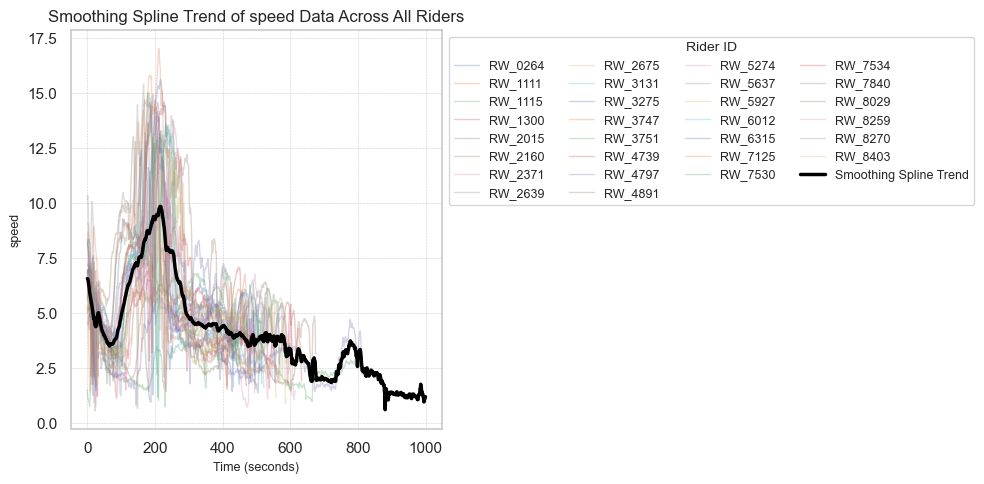

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import seaborn as sns

# Set up Seaborn for enhanced visual style
sns.set(style="whitegrid")

# Step 1: Calculate the mean cadence across all riders at each time point
mean_speed = smoothed_speed_df.mean(axis=1)

# Step 2: Prepare the data for smoothing spline
x = np.arange(len(mean_speed))  # Time index as the independent variable
y = mean_speed.values  # Mean cadence as the dependent variable

# Step 3: Apply a smoothing spline
smoothing_factor = 0.00001  # Adjust the smoothing factor to control smoothness
spline = UnivariateSpline(x, y, s=smoothing_factor)
spline_smoothed_speed = spline(x)

# Step 4: Plot each rider's cadence data with transparency and the smoothing spline trend line
plt.figure(figsize=(10, 5))

# Plot all riders' cadence data with transparency
for rider_id in smoothed_speed_df.columns:
    plt.plot(smoothed_speed_df.index, smoothed_speed_df[rider_id], label=rider_id, linewidth=1, alpha=0.3)

# Plot the smoothing spline trend line
plt.plot(smoothed_speed_df.index, spline_smoothed_speed, color='black', linewidth=2.5, label='Smoothing Spline Trend', linestyle='-')

# Add labels and title with professional formatting
plt.xlabel('Time (seconds)', fontsize=9)
plt.ylabel('speed', fontsize=9)
plt.title('Smoothing Spline Trend of speed Data Across All Riders', fontsize=12)

# Add a legend outside the plot for better readability
plt.legend(title='Rider ID', title_fontsize=10, fontsize=9, bbox_to_anchor=(1, 1), loc='upper left', ncol=4)

# Adjust the ticks for better readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add gridlines with professional styling
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

# Ensure the layout is tight and the plot doesn't overlap
plt.tight_layout()

# Save the figure as a high-resolution image
plt.savefig('cadence_trend_smoothing_spline.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


C:\Users\ahmad\anaconda\Lib\site-packages\scipy\interpolate\_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Error Metrics for Different Smoothing Factors:
   Smoothing Factor       MAE           MSE      RMSE        R²
0      2.000000e+00  0.034144  1.999113e-03  0.044711  0.999552
1      1.000000e+00  0.024625  1.000135e-03  0.031625  0.999776
2      1.000000e-01  0.007932  1.000678e-04  0.010003  0.999978
3      1.000000e-03  0.000659  1.000019e-06  0.001000  1.000000
4      1.000000e-05  0.000047  9.999862e-09  0.000100  1.000000
5      1.000000e-07  0.000004  1.020973e-10  0.000010  1.000000


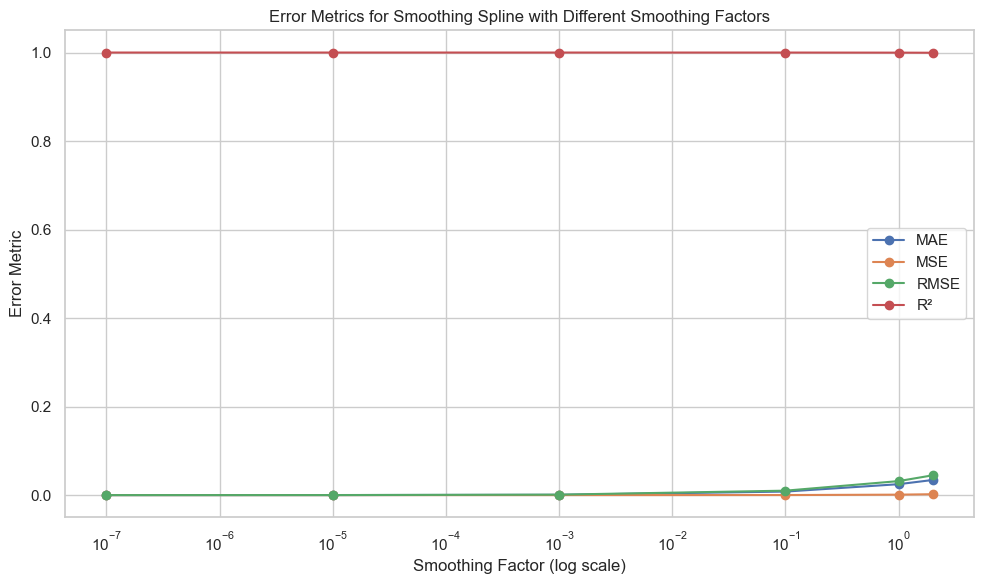

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Step 1: Calculate the mean cadence across all riders at each time point
mean_speed = smoothed_speed_df.mean(axis=1)

# Define the different smoothing factors to test
smoothing_factors = [2,1, 0.1, 0.001, 0.00001, 0.0000001]

# Initialize a list to store error metrics for each smoothing factor
error_metrics = []

# Prepare the data for the spline (time index as X, mean cadence as y)
x = np.arange(len(mean_speed))
y = mean_speed.values

# Loop over each smoothing factor to apply the smoothing spline and calculate error metrics
for s in smoothing_factors:
    # Apply smoothing spline with the current smoothing factor
    spline = UnivariateSpline(x, y, s=s)
    smoothed_speed = spline(x)
    
    # Calculate error metrics
    mae = mean_absolute_error(y, smoothed_speed)
    mse = mean_squared_error(y, smoothed_speed)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y - smoothed_speed) ** 2) / np.sum((y - np.mean(y)) ** 2))
    
    # Store the results
    error_metrics.append({
        "Smoothing Factor": s,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each smoothing factor
print("Error Metrics for Different Smoothing Factors:")
print(error_metrics_df)

# Plot the error metrics (optional)
plt.figure(figsize=(10, 6))
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["MAE"], label="MAE", marker='o')
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["MSE"], label="MSE", marker='o')
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["RMSE"], label="RMSE", marker='o')
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["R²"], label="R²", marker='o')

# Customize plot
plt.xlabel("Smoothing Factor (log scale)")
plt.xscale('log')  # Use a log scale for smoothing factor for better visibility
plt.ylabel("Error Metric")
plt.title("Error Metrics for Smoothing Spline with Different Smoothing Factors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
